## Visualizing facebook social network
http://snap.stanford.edu/data/ego-Facebook.html

In [16]:
%matplotlib inline
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nxcom
import random
from numpy import random as nprand
random.seed(123)
nprand.seed(123)

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})

In [3]:
G_social = nx.read_edgelist('../data/facebook_combined.txt')

In [4]:
nx.info(G_social)

'Name: \nType: Graph\nNumber of nodes: 4039\nNumber of edges: 88234\nAverage degree:  43.6910'

- `node_size`:  指定节点的尺寸大小(默认是300)
- `node_color`:  指定节点的颜色 (默认是红色，可以用字符串简单标识颜色，例如'r'为红色，'b'为绿色等)
- `node_shape`:  节点的形状（默认是圆形，用字符串'o'标识）
- `alpha`: 透明度 (默认是1.0，不透明，0为完全透明) 
- `width`: 边的宽度 (默认为1.0)
- `edge_color`: 边的颜色(默认为黑色)
- `style`: 边的样式(默认为实现，可选： solid|dashed|dotted,dashdot)
- `with_labels`: 节点是否带标签（默认为True）
- `font_size`: 节点标签字体大小 (默认为12)
- `font_color`: 节点标签字体颜色（默认为黑色）

In [11]:
plt.style.use('fivethirtyeight')
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

In [12]:
def set_node_community(G, communities):
        '''Add community to node attributes'''
        for c, v_c in enumerate(communities):
            for v in v_c:
                # Add 1 to save 0 for external edges
                G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)            

In [13]:
pos = nx.spring_layout(G_social, k=0.1)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(
    G_social, 
    pos=pos, 
    node_size=0, 
    edge_color="#444444", 
    alpha=0.05, 
    with_labels=False)

In [8]:
communities = sorted(nxcom.greedy_modularity_communities(G_social), key=len, reverse=True)
len(communities)

13

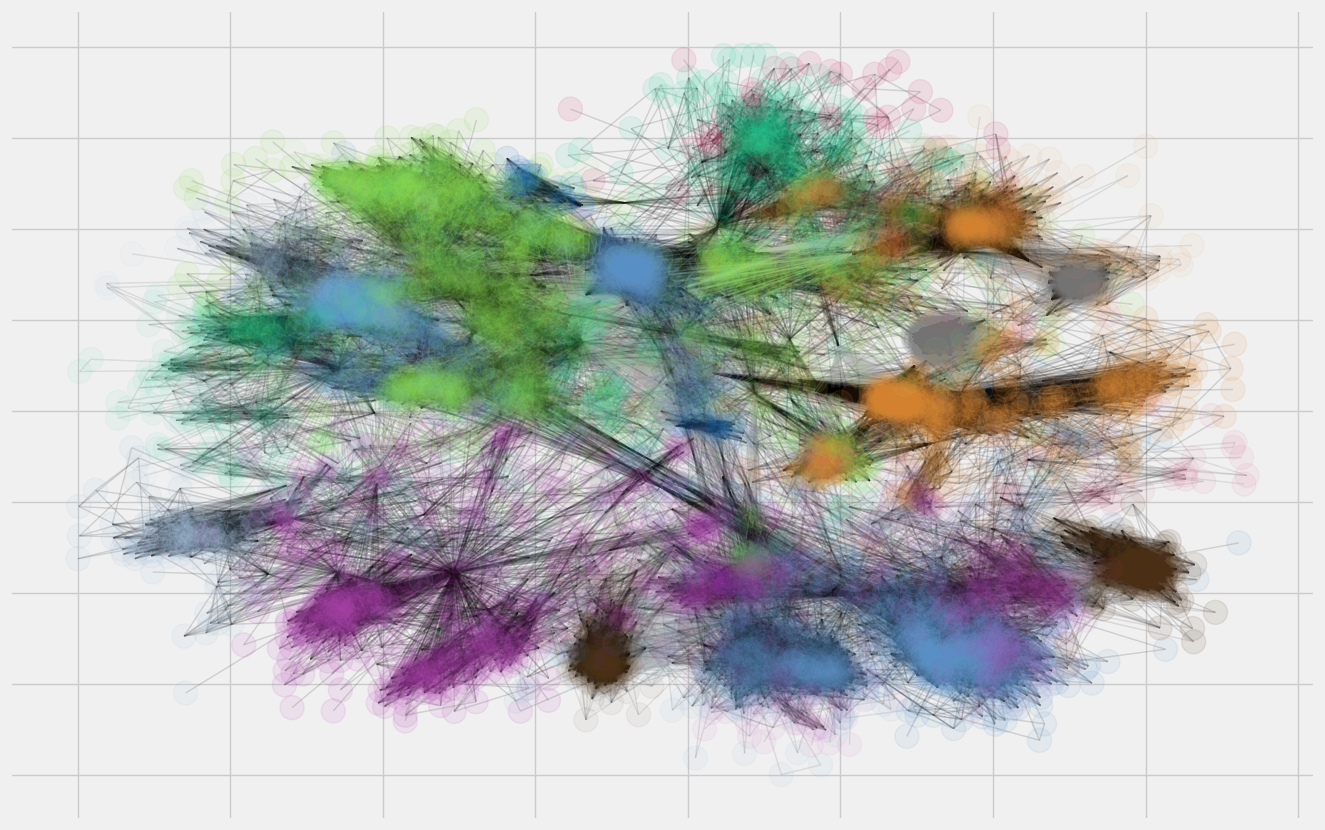

In [14]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'figure.figsize': (15, 10)})
plt.style.use('dark_background')

# Set node and edge communities
set_node_community(G_social, communities)
set_edge_community(G_social)

# Set community color for internal edges
external = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] > 0]
internal_color = ["black" for e in internal]
node_color = [get_color(G_social.nodes[v]['community']) for v in G_social.nodes]
# external edges
nx.draw_networkx(
    G_social, 
    pos=pos, 
    node_size=0, 
    edgelist=external, 
    edge_color="silver",
    node_color=node_color,
    alpha=0.2, 
    with_labels=False)
# internal edges
nx.draw_networkx(
    G_social, pos=pos, 
    edgelist=internal, 
    edge_color=internal_color,
    node_color=node_color,
    alpha=0.05, 
    with_labels=False)

plt.show()

In [17]:
from collections import defaultdict
import numpy as np

def plotDegreeDistribution(G):
    degs = defaultdict(int)
    for i in dict(G.degree()).values(): degs[i]+=1
    items = sorted ( degs.items () )
    x, y = np.array(items).T
    y_sum = np.sum(y)
    y = [float(i)/y_sum for i in y]
    plt.plot(x, y, 'b-o')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(['Degree'])
    plt.xlabel('$K$', fontsize = 20)
    plt.ylabel('$P(K)$', fontsize = 20)
    plt.title('$Degree\,Distribution$', fontsize = 20)
    plt.show()   

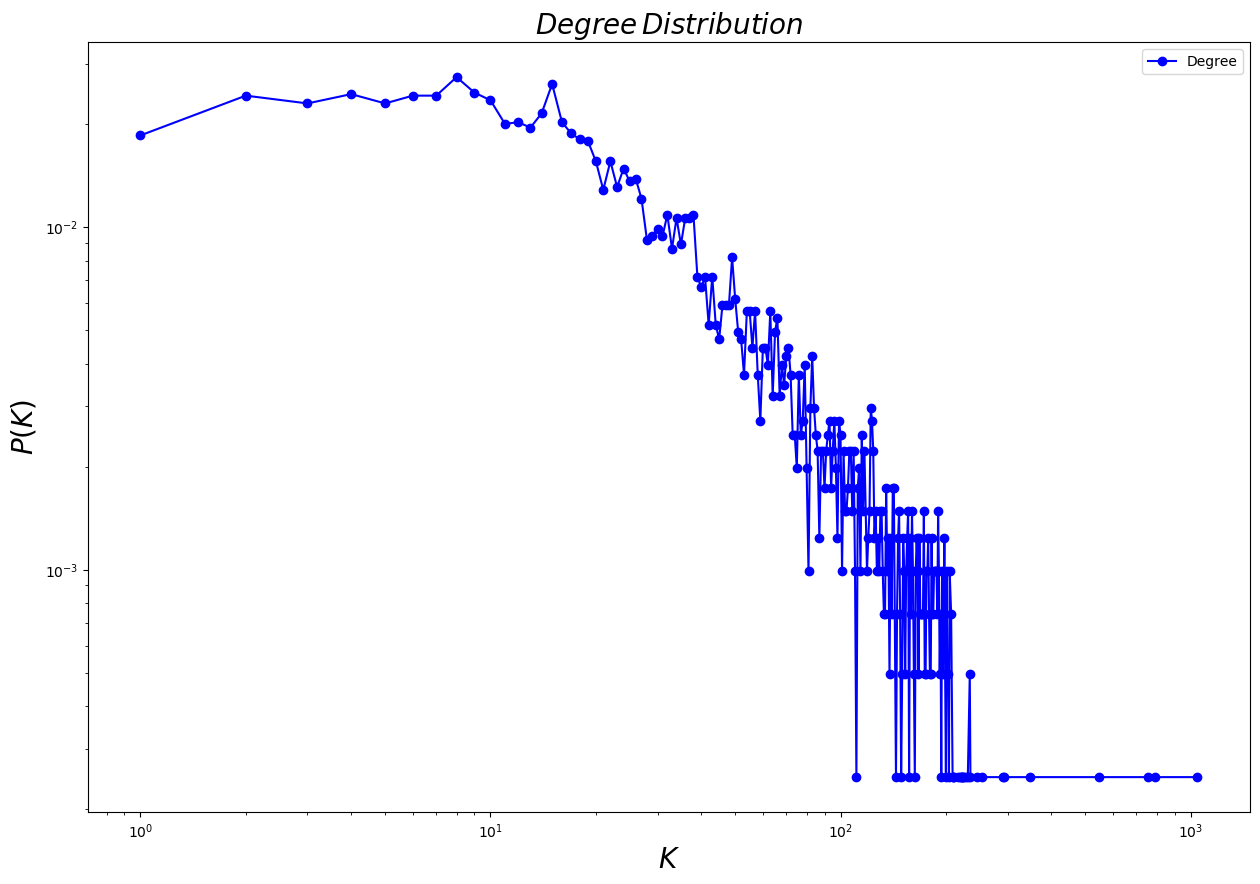

In [18]:
plotDegreeDistribution(G_social)